In [1]:
from google.colab import files
uploaded = files.upload()

Saving train_v9rqX0R.csv to train_v9rqX0R.csv


In [2]:
from google.colab import files
uploaded = files.upload()

Saving test_AbJTz2l.csv to test_AbJTz2l.csv


In [3]:
import io
import pandas as pd
df=pd.read_csv(r'train_v9rqX0R.csv')

In [4]:
import io
import pandas as pd
df1=pd.read_csv(r'test_AbJTz2l.csv')

# **Sales Prediction for Big Mart Outlets**

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

## **Importing Libraries**

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **Shape of train and test datasets**

In [6]:
df.shape,df1.shape

((8523, 12), (5681, 11))

In [7]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


## **How does the data look mathematically**

In [9]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Maximum OutletSales is 13086.964 whereas minimum value is 33.29

In [10]:
df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


## **Data type of columns**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


## **Duplicate Values**

In [13]:
df.duplicated().sum()

0

In [14]:
df1.duplicated().sum()

0

## **Cleaning the Data**

In [15]:
df=df.drop('Item_Identifier',axis=1)
df1=df1.drop('Item_Identifier',axis=1)
df=df.drop('Outlet_Identifier',axis=1)
df1=df1.drop('Outlet_Identifier',axis=1)

In [16]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [17]:
df1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300,reg,0.038428,Dairy,87.3198,2007,NaN,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,1998,NaN,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,2007,NaN,Tier 2,Supermarket Type1
4,NaN,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


## **Missing Values**

In [18]:
df.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [19]:
df.isnull().mean()*100

Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [20]:
df1.isnull().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [21]:
df1.isnull().mean()*100

Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

## **plotting Missing values on Heatmap**

<Axes: >

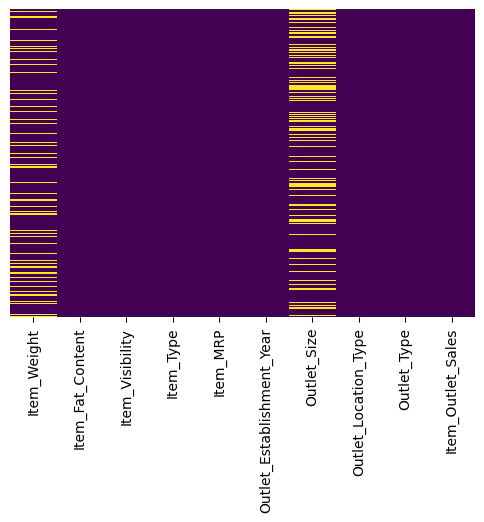

In [22]:
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

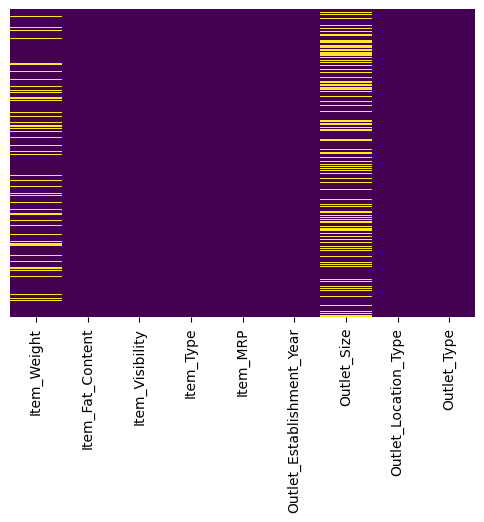

In [23]:
plt.figure(figsize=(6,4))
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## **Missing Value Imputation**

In [24]:
df['Item_Weight'].unique()

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 ,    nan,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   , 13.35 ,
       18.85 , 14.6  , 13.85 , 13.   ,  7.645, 11.65 ,  5.925, 19.25 ,
       18.6  , 18.7  , 17.85 , 10.   ,  8.85 ,  9.8  , 13.6  , 21.35 ,
       12.15 ,  6.42 , 19.6  , 15.85 ,  7.39 , 10.195,  9.895, 10.895,
        7.905,  9.195,  8.365,  7.97 , 17.7  , 19.35 ,  8.645, 15.6  ,
       18.25 ,  7.855,  7.825,  8.39 , 12.85 , 19.   ,  5.905,  7.76 ,
       16.75 , 15.5  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,
        8.75 , 13.3  ,  8.31 , 19.75 , 17.1  , 10.5  ,  6.635, 14.15 ,
        8.89 ,  9.1  ,  7.5  , 16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,
        8.6  , 12.6  ,  8.88 , 20.5  , 13.5  ,  7.235,  6.92 ,  8.02 ,
       12.8  , 16.6  , 14.   , 16.   , 21.25 ,  7.365, 18.35 ,  5.465,
        7.27 ,  6.155, 19.5  , 15.2  , 14.5  , 13.1  , 12.3  , 11.1  ,
       11.3  ,  5.75 , 11.35 ,  6.525, 10.3  ,  5.78 , 11.85 , 18.75 ,
      

In [25]:
df1['Item_Weight'].unique()

array([20.75 ,  8.3  , 14.6  ,  7.315,    nan,  9.8  , 19.35 ,  6.305,
        5.985, 16.6  ,  6.59 ,  4.785, 16.75 ,  6.135, 19.85 , 17.85 ,
       13.6  ,  7.1  , 19.2  , 13.65 ,  6.785, 13.   ,  5.825, 13.8  ,
       12.8  ,  9.5  , 12.5  ,  5.78 , 10.395, 18.35 , 21.1  , 19.75 ,
        8.43 , 15.35 ,  6.71 , 10.195, 11.65 , 12.85 , 12.15 , 18.25 ,
        5.98 , 12.65 , 13.1  , 20.7  ,  7.855, 13.35 , 17.25 ,  8.315,
       21.35 ,  5.88 ,  7.435, 14.65 , 14.   , 18.2  , 17.6  ,  7.71 ,
        7.81 , 16.35 , 16.1  ,  5.34 ,  5.51 ,  6.61 ,  6.38 ,  8.71 ,
       17.75 ,  6.44 , 12.6  ,  7.935, 18.5  ,  6.035, 11.8  ,  6.26 ,
       16.5  , 15.7  ,  6.635,  8.155,  6.175,  8.18 ,  8.355,  6.905,
       20.35 , 19.25 ,  5.48 ,  5.425, 12.1  , 11.   ,  5.765,  5.44 ,
        6.13 ,  8.195, 14.15 , 14.3  ,  5.635,  5.73 ,  7.155, 15.2  ,
       15.25 ,  8.76 ,  9.13 , 19.6  , 10.   , 11.3  ,  6.57 , 13.15 ,
        4.635, 10.6  ,  9.3  ,  7.02 ,  7.825, 19.1  ,  7.51 ,  8.85 ,
      

In [26]:
df['Item_Weight'].mean()

12.857645184135976

In [27]:
df1['Item_Weight'].mean()

12.695633368756642

In [28]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())
df.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [29]:
df1['Item_Weight']=df1['Item_Weight'].fillna(df1['Item_Weight'].mean())
df1.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [30]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [31]:
df1['Outlet_Size'].unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [32]:
df['Outlet_Size'].mode()[0]

'Medium'

In [33]:
df1['Outlet_Size'].mode()[0]

'Medium'

In [34]:
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [35]:
df1['Outlet_Size']=df1['Outlet_Size'].fillna(df1['Outlet_Size'].mode()[0])
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [36]:
df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [37]:
df1.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

**Categorical Features:**

Item_Fat_Content  

Item_Type

Outlet_Size

Outlet_Location_Type

Outlet_Type

## **Value Counts of all Features**

In [38]:
print(df['Item_Weight'].value_counts())
print(df['Item_Fat_Content'].value_counts())
print(df['Item_Visibility'].value_counts())
print(df['Item_Type'].value_counts())
print(df['Item_MRP'].value_counts())

print(df['Outlet_Establishment_Year'].value_counts())
print(df['Outlet_Size'].value_counts())
print(df['Outlet_Location_Type'].value_counts())
print(df['Outlet_Type'].value_counts())

12.857645    1463
12.150000      86
17.600000      82
13.650000      77
11.800000      76
             ... 
7.275000        2
7.685000        1
9.420000        1
6.520000        1
5.400000        1
Name: Item_Weight, Length: 416, dtype: int64
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods           

## **Feature Encoding**

In [39]:
df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [40]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [42]:
df['Item_Fat_Content']=le.fit_transform(df['Item_Fat_Content'])
df['Item_Type']=le.fit_transform(df['Item_Type'])
df['Outlet_Size']=le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']=le.fit_transform(df['Outlet_Type'])

In [43]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052


## **Performing EDA**

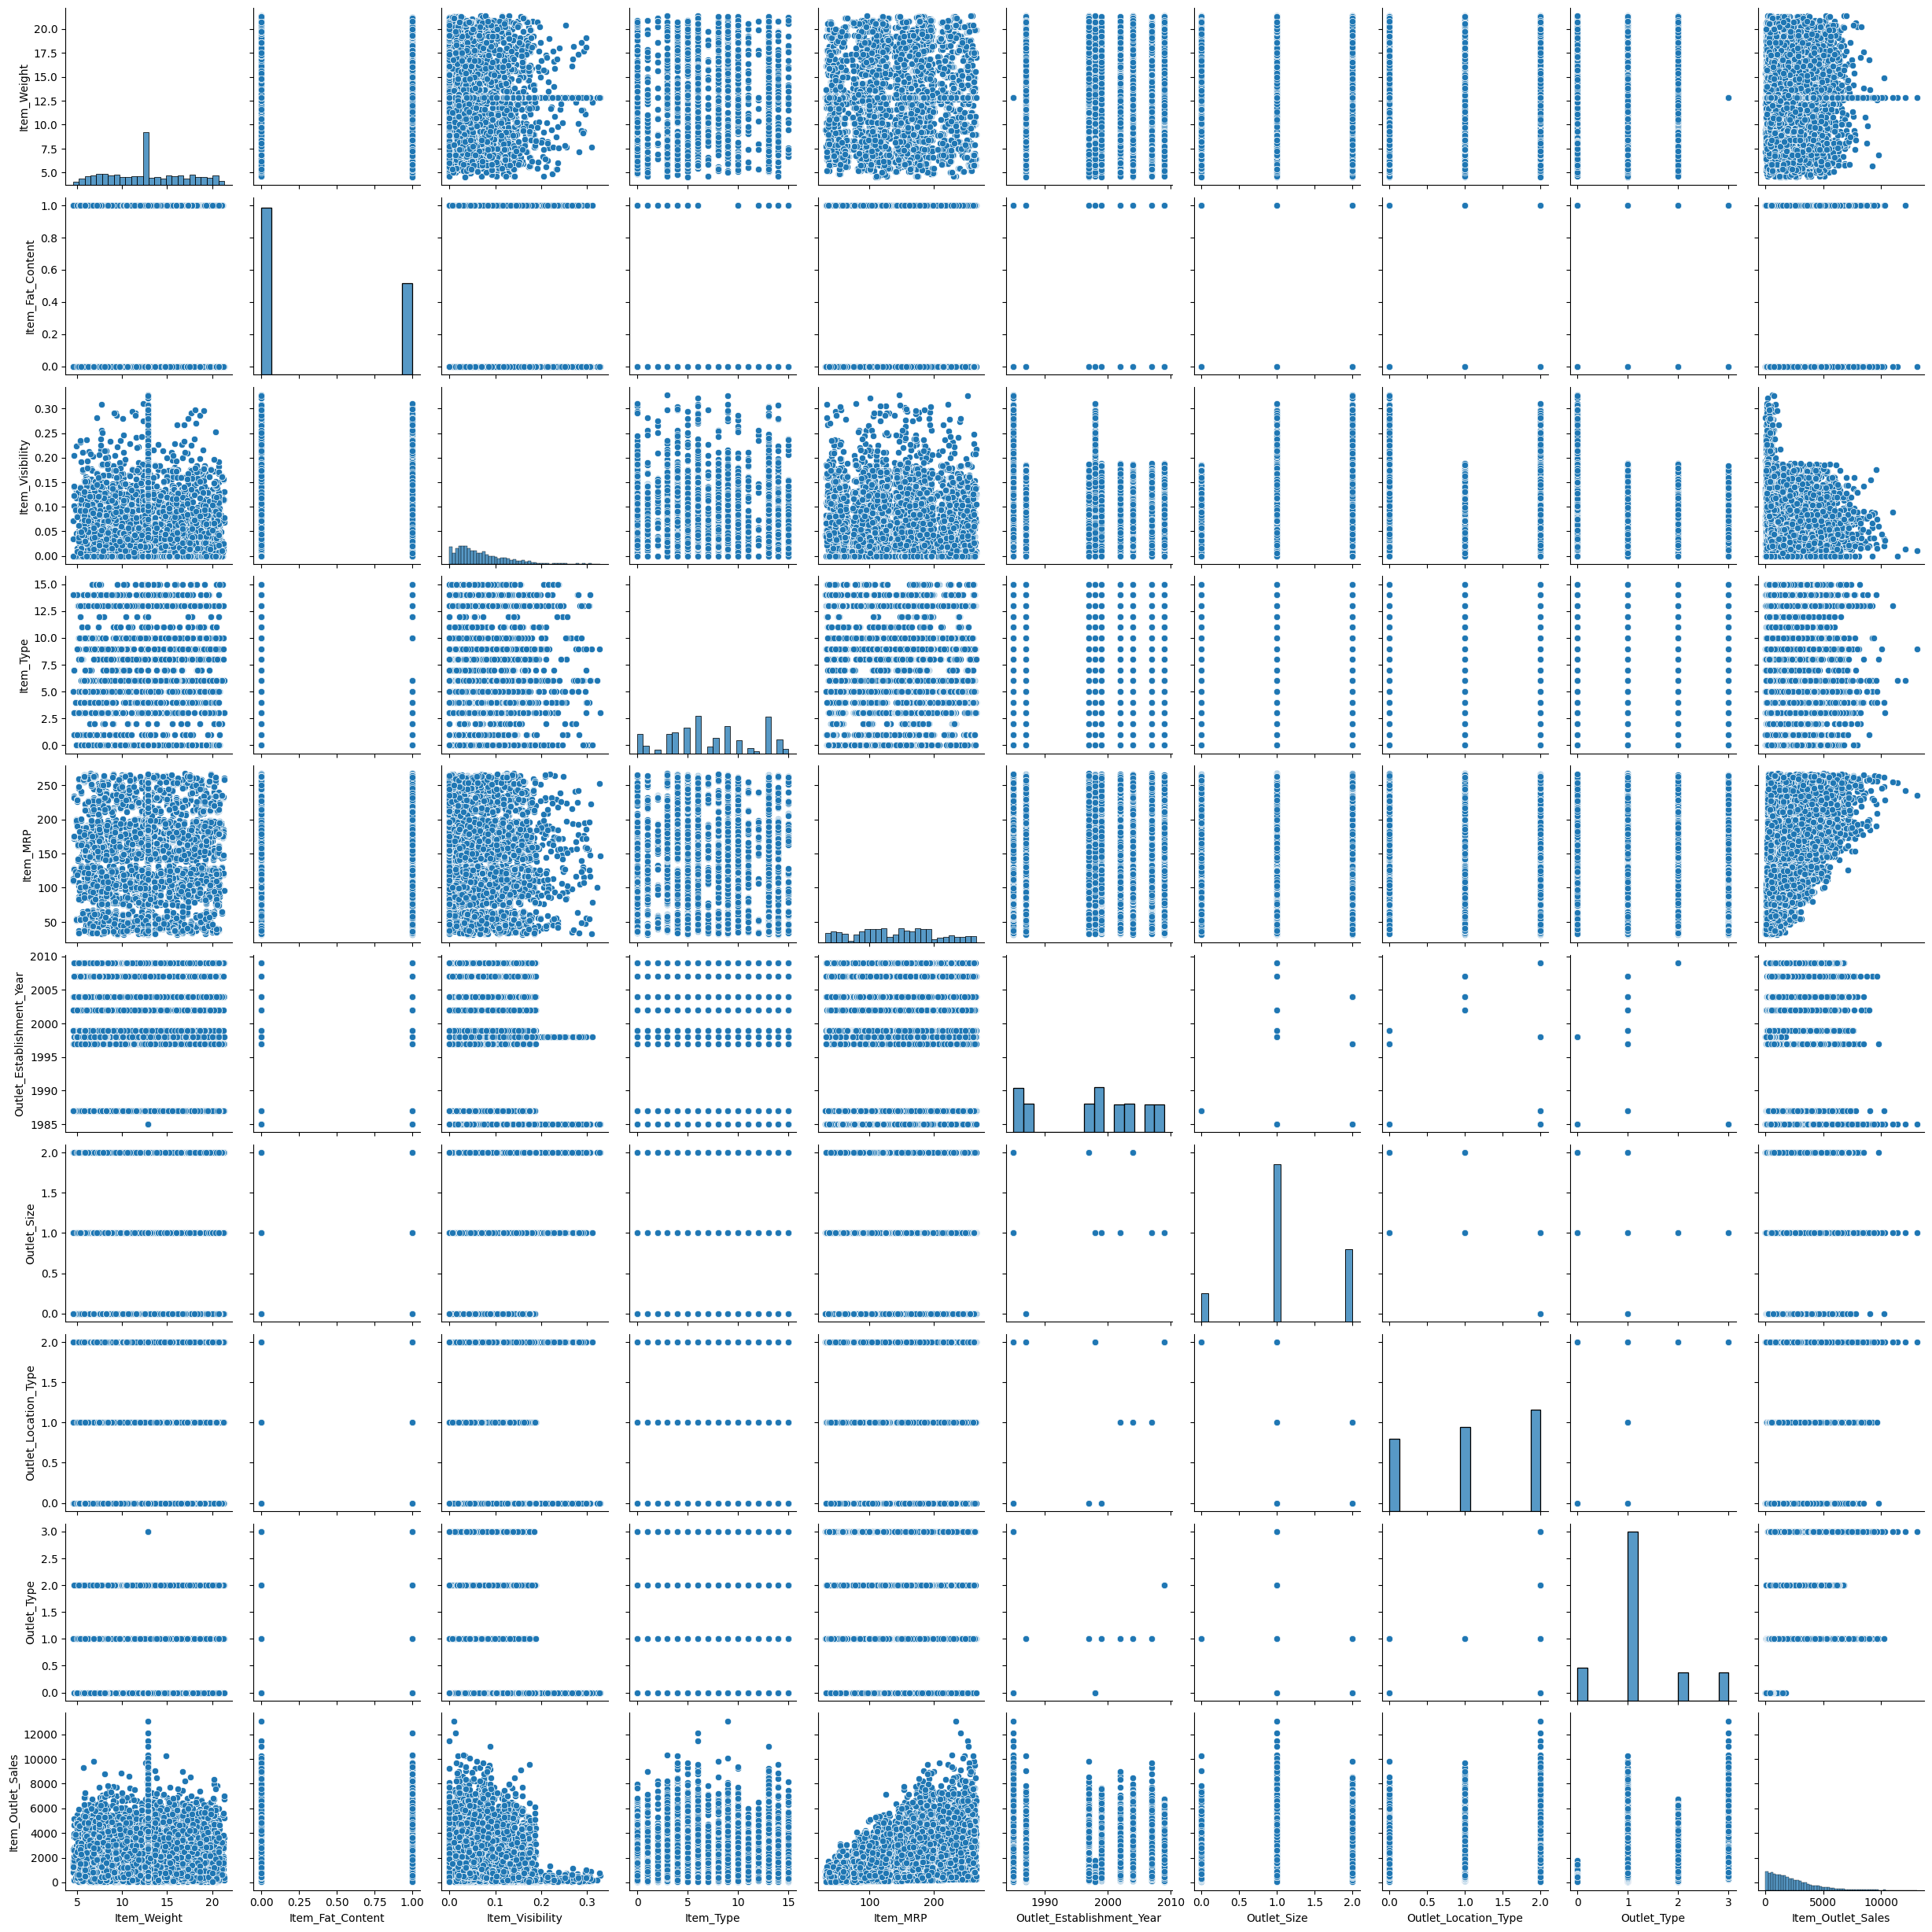

In [44]:
sns.pairplot(df)

<ipython-input-45-ff1fadbbdba6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Item_Fat_Content',data=df,palette='husl')


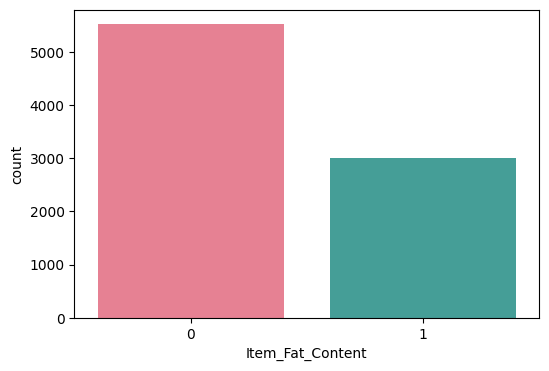

In [45]:
plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content',data=df,palette='husl')
plt.show()


Low fat items are purchased more

<ipython-input-46-d2e52338604c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Item_Type',data=df,palette='husl')


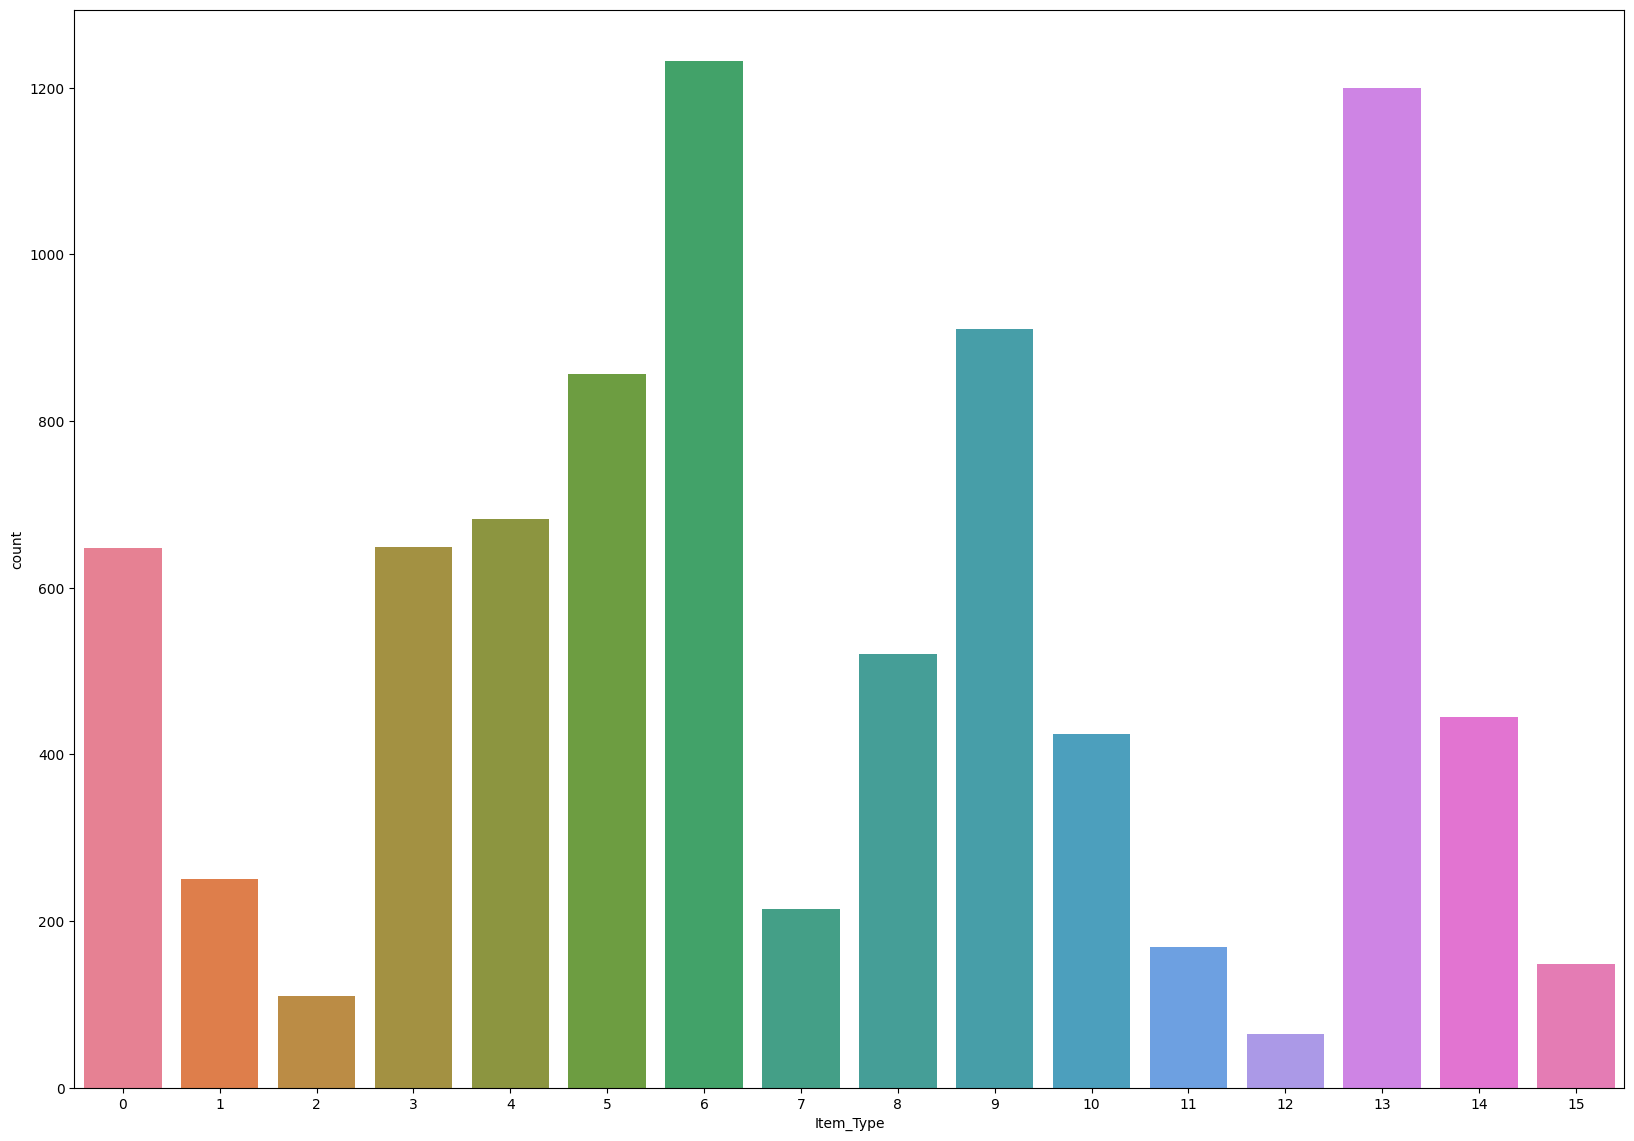

In [46]:
plt.figure(figsize=(20,14))
sns.countplot(x='Item_Type',data=df,palette='husl')
plt.show()


6 and 13 are purchased in the highest amount

9 is also purchased in good amount

<ipython-input-47-61ef0e13967e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outlet_Establishment_Year',data=df,palette='husl')


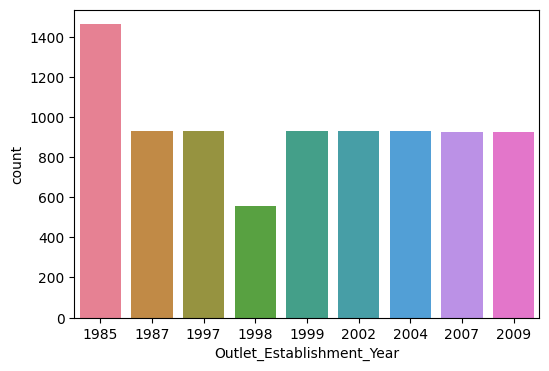

In [47]:
plt.figure(figsize=(6,4))
sns.countplot(x='Outlet_Establishment_Year',data=df,palette='husl')
plt.show()


Items from the establishment year of 1985 has a higher amount of purchase

<ipython-input-48-44d9e347f74a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outlet_Size',data=df,palette='husl')


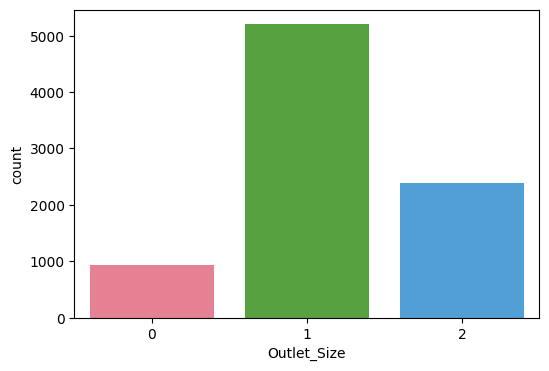

In [48]:
plt.figure(figsize=(6,4))
sns.countplot(x='Outlet_Size',data=df,palette='husl')
plt.show()


Tier3 has more sale

<ipython-input-49-945fdd36898e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outlet_Type',data=df,palette='husl')


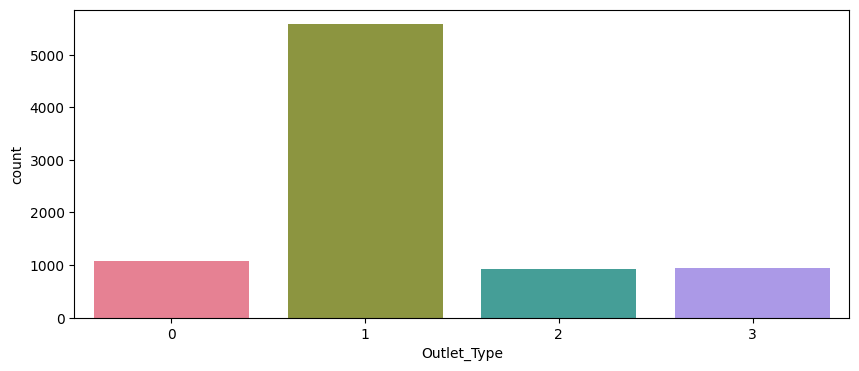

In [49]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type',data=df,palette='husl')
plt.show()


Supermarket Type has more sales

<ipython-input-50-02fc5f6bcb04>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Weight'])


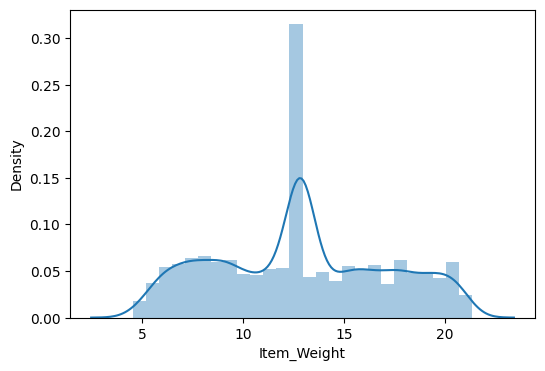

In [50]:
plt.figure(figsize=(6,4))
sns.distplot(df['Item_Weight'])
plt.show()

<ipython-input-51-5331aad0e241>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Visibility'])


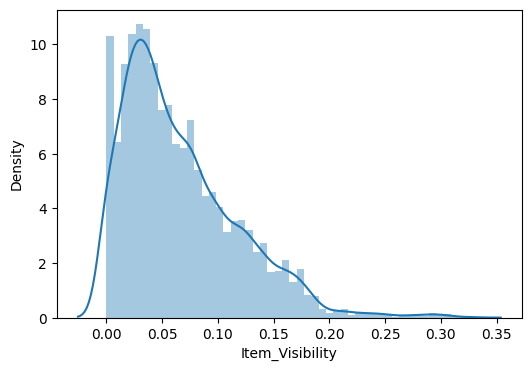

In [51]:
plt.figure(figsize=(6,4))
sns.distplot(df['Item_Visibility'])
plt.show()


<ipython-input-52-ccb9aafcfca4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_MRP'])


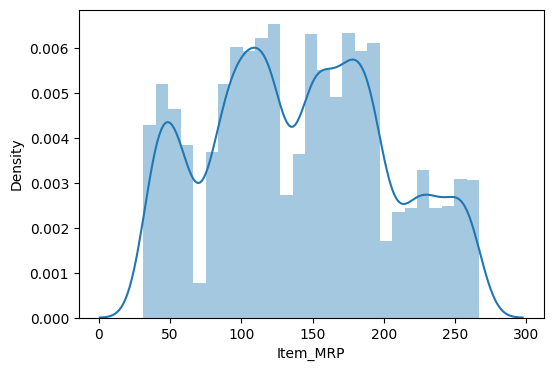

In [52]:
plt.figure(figsize=(6,4))
sns.distplot(df['Item_MRP'])
plt.show()


<ipython-input-53-5759d8d60f00>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'])


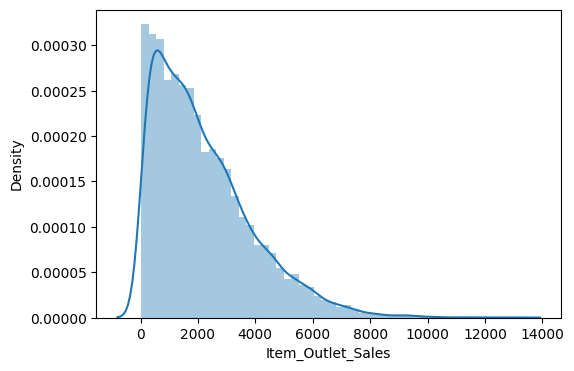

In [53]:
plt.figure(figsize=(6,4))
sns.distplot(df['Item_Outlet_Sales'])
plt.show()


## **Using Boxplot() to detect outliers**

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

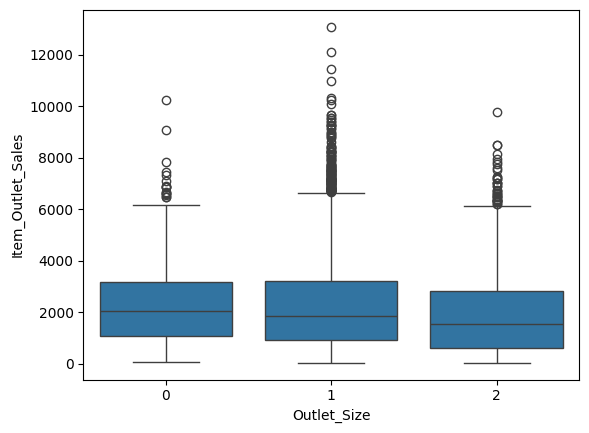

In [54]:
sns.boxplot(x=df['Outlet_Size'],y=df['Item_Outlet_Sales'])

<Axes: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

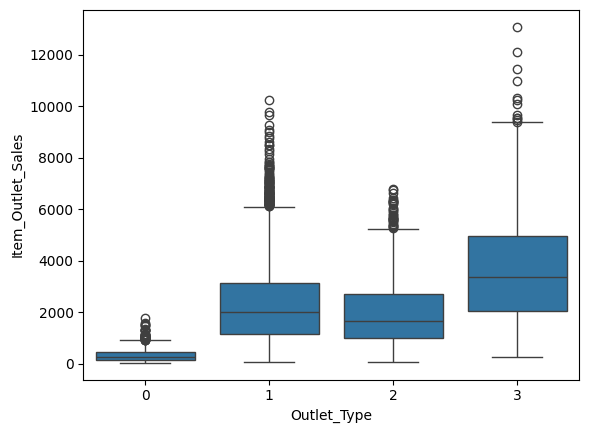

In [55]:
sns.boxplot(x=df['Outlet_Type'],y=df['Item_Outlet_Sales'])

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

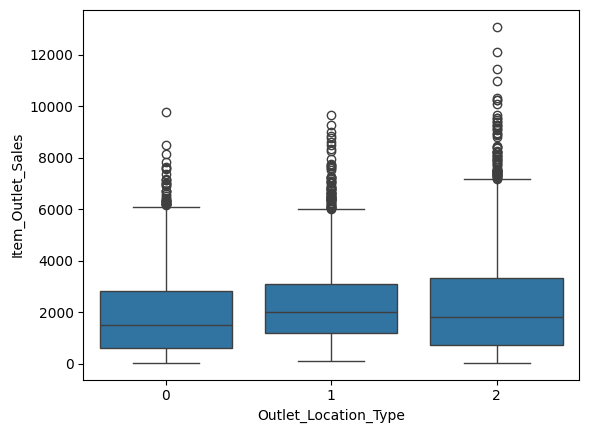

In [56]:
sns.boxplot(x=df['Outlet_Location_Type'],y=df['Item_Outlet_Sales'])

<Axes: xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

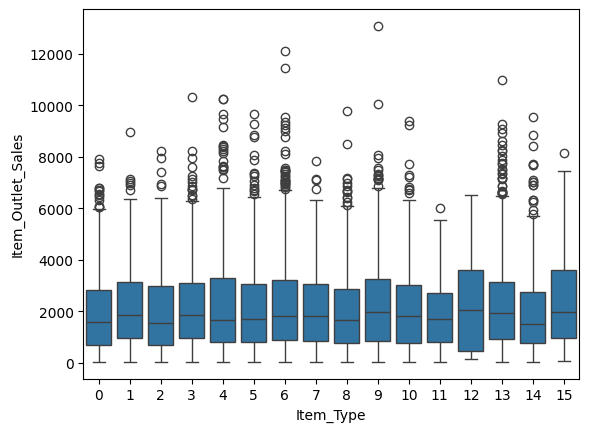

In [57]:
sns.boxplot(x=df['Item_Type'],y=df['Item_Outlet_Sales'])

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

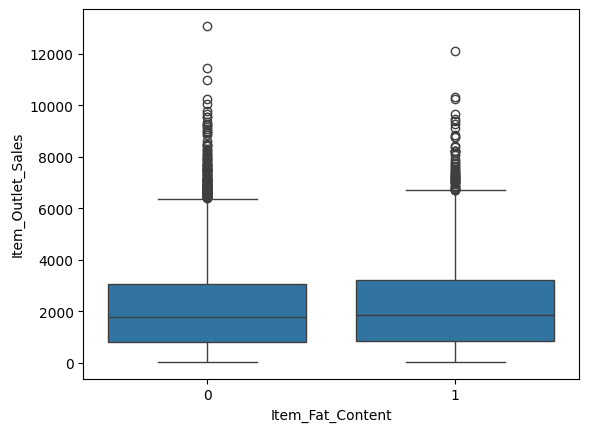

In [58]:
sns.boxplot(x=df['Item_Fat_Content'],y=df['Item_Outlet_Sales'])

## **Feature Scaling**

In [59]:
## splitting train and test data
x=df
y=df['Item_Outlet_Sales']
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [60]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((7670, 10), (853, 10), (7670,), (853,))

### **Standard Scaling**

In [61]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
##fit the scaler into train set
Scaler.fit(x_train)

StandardScaler()

In [62]:
## transform the train and test datasets
Scaler=StandardScaler()
x_test_scaled=Scaler.fit_transform(x_test.values.reshape(-1, 1))


In [63]:
Scaler=StandardScaler()
Scaler.fit(x_train)
x_train_scaled=Scaler.fit_transform(x_train)
x_test_scaled=Scaler.fit_transform(x_test.values.reshape(-1, 1))

In [64]:
x_train_scaled = pd.DataFrame(x_train_scaled)
columns=x_train_scaled.columns

In [65]:
x_test_scaled = pd.DataFrame(x_test_scaled)
columns=x_test_scaled.columns

In [66]:
np.round((x_train).describe(),1)
np.round((x_train_scaled).describe(),1)

,0,1,2,3,4,5,6,7,8,9
count,7670.0,7670.0,7670.0,7670.0,7670.0,7670.0,7670.0,7670.0,7670.0,7670.0
mean,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.0,-0.7,-1.3,-1.7,-1.8,-1.5,-2.0,-1.4,-1.5,-1.3
25%,-0.8,-0.7,-0.8,-0.8,-0.8,-1.3,-0.3,-1.4,-0.3,-0.8
50%,-0.0,-0.7,-0.2,-0.3,0.0,0.1,-0.3,-0.1,-0.3,-0.2
75%,0.8,1.4,0.5,0.7,0.7,0.7,1.4,1.1,-0.3,0.5
max,2.0,1.4,5.1,1.8,2.0,1.3,1.4,1.1,2.3,6.4


<ipython-input-67-2889b1ee122a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Weight'],ax=ax1,hist=False)
<ipython-input-67-2889b1ee122a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'],ax=ax1,hist=False)
<ipython-input-67-2889b1ee122a>:7: U

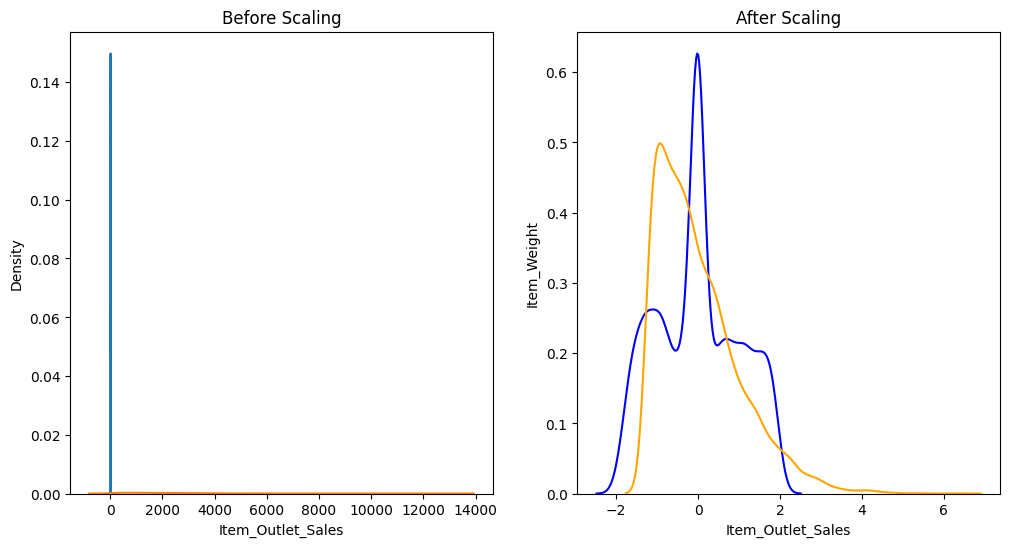

In [67]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
## before scaling
sns.distplot(df['Item_Weight'],ax=ax1,hist=False)
sns.distplot(df['Item_Outlet_Sales'],ax=ax1,hist=False)
ax1.set_title('Before Scaling')
## after scaling
sns.distplot(x_train_scaled[0],ax=ax2,color='blue',hist=False)
sns.distplot(x_train_scaled[9],ax=ax2,color='orange',hist=False)
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Item_Weight')
ax2.set_title('After Scaling')
plt.show()

<ipython-input-68-b234d8525e16>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Fat_Content'],ax=ax1,hist=False)
<ipython-input-68-b234d8525e16>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'],ax=ax1,hist=False)
<ipython-input-68-b234d8525e16>

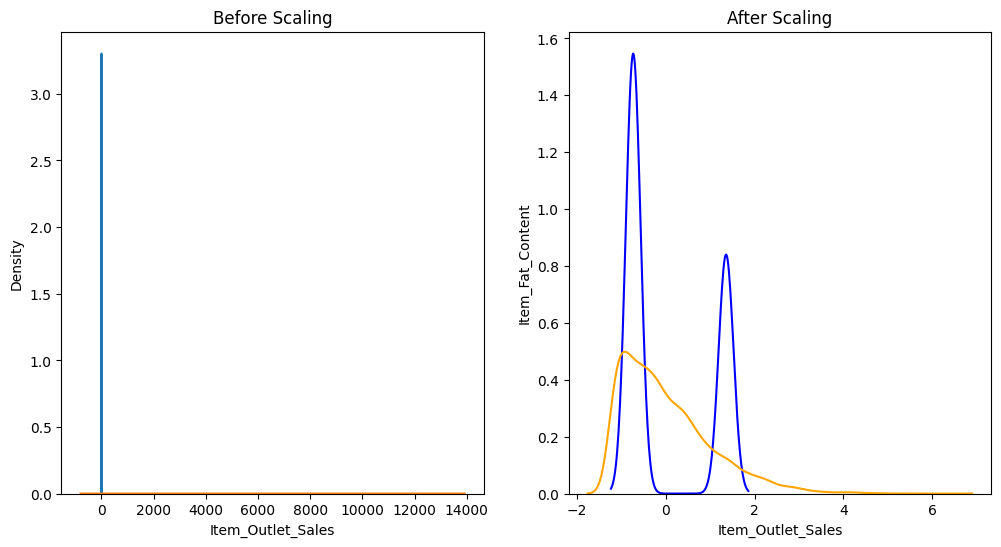

In [68]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
## before scaling
sns.distplot(df['Item_Fat_Content'],ax=ax1,hist=False)
sns.distplot(df['Item_Outlet_Sales'],ax=ax1,hist=False)
ax1.set_title('Before Scaling')
## after scaling
sns.distplot(x_train_scaled[1],ax=ax2,color='blue',hist=False)
sns.distplot(x_train_scaled[9],ax=ax2,color='orange',hist=False)
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Item_Fat_Content')
ax2.set_title('After Scaling')
plt.show()

<ipython-input-69-948175510326>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Visibility'],ax=ax1,hist=False)
<ipython-input-69-948175510326>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'],ax=ax1,hist=False)
<ipython-input-69-948175510326>:

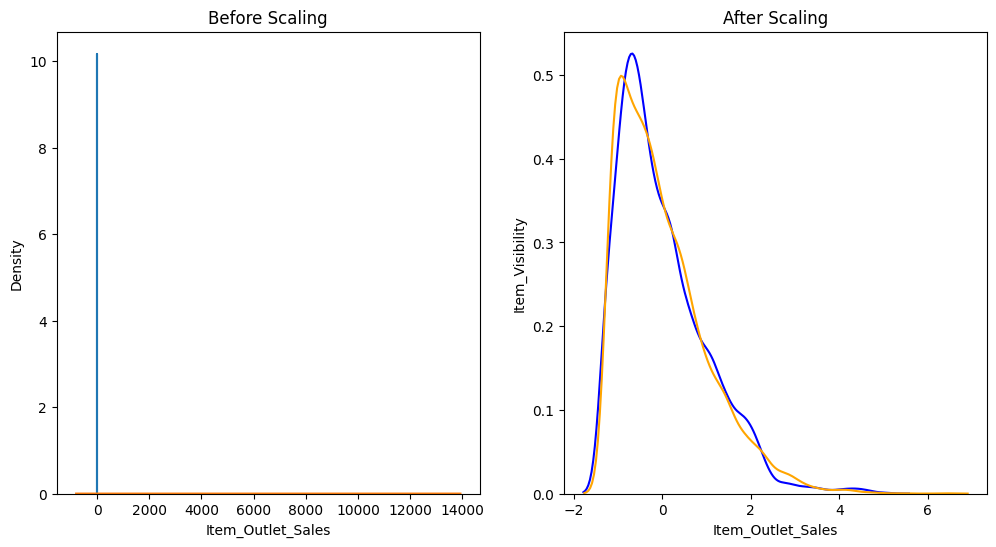

In [69]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
## before scaling
sns.distplot(df['Item_Visibility'],ax=ax1,hist=False)
sns.distplot(df['Item_Outlet_Sales'],ax=ax1,hist=False)
ax1.set_title('Before Scaling')
## after scaling
sns.distplot(x_train_scaled[2],ax=ax2,color='blue',hist=False)
sns.distplot(x_train_scaled[9],ax=ax2,color='orange',hist=False)
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Item_Visibility')
ax2.set_title('After Scaling')
plt.show()

<ipython-input-70-2adc97f038cc>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Type'],ax=ax1,hist=False)
<ipython-input-70-2adc97f038cc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'],ax=ax1,hist=False)
<ipython-input-70-2adc97f038cc>:7: Use

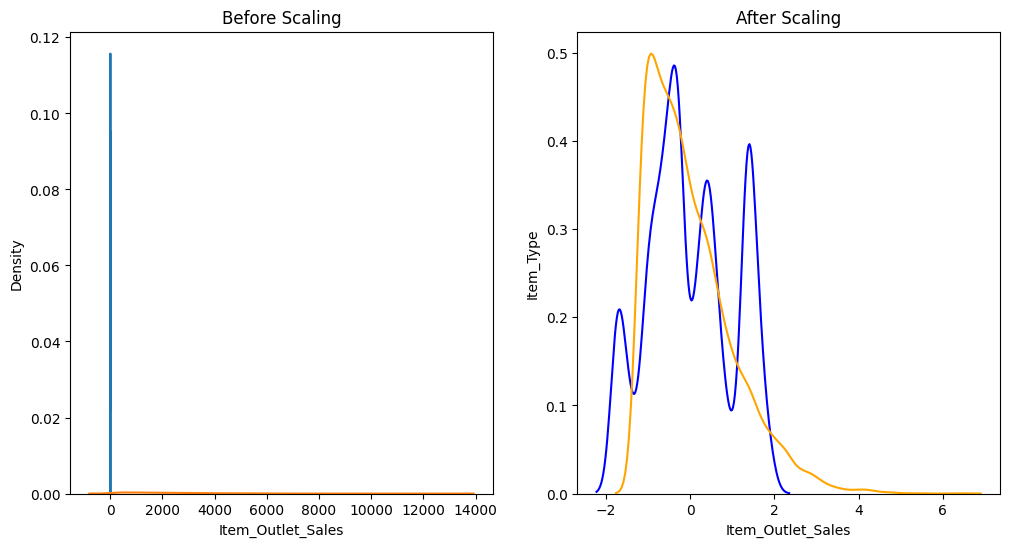

In [70]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
## before scaling
sns.distplot(df['Item_Type'],ax=ax1,hist=False)
sns.distplot(df['Item_Outlet_Sales'],ax=ax1,hist=False)
ax1.set_title('Before Scaling')
## after scaling
sns.distplot(x_train_scaled[3],ax=ax2,color='blue',hist=False)
sns.distplot(x_train_scaled[9],ax=ax2,color='orange',hist=False)
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Item_Type')
ax2.set_title('After Scaling')
plt.show()

<ipython-input-71-adcd46f704b6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_MRP'],ax=ax1,hist=False)
<ipython-input-71-adcd46f704b6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'],ax=ax1,hist=False)
<ipython-input-71-adcd46f704b6>:7: User

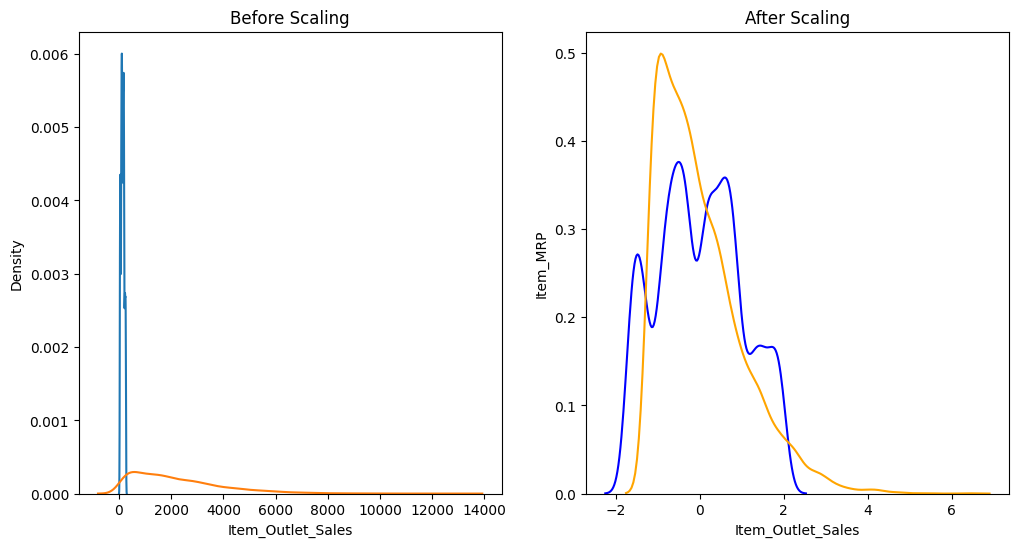

In [71]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
## before scaling
sns.distplot(df['Item_MRP'],ax=ax1,hist=False)
sns.distplot(df['Item_Outlet_Sales'],ax=ax1,hist=False)
ax1.set_title('Before Scaling')
## after scaling
sns.distplot(x_train_scaled[4],ax=ax2,color='blue',hist=False)
sns.distplot(x_train_scaled[9],ax=ax2,color='orange',hist=False)
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Item_MRP')
ax2.set_title('After Scaling')
plt.show()

<ipython-input-72-dcb34cdaaa31>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Outlet_Establishment_Year'],ax=ax1,hist=False)
<ipython-input-72-dcb34cdaaa31>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'],ax=ax1,hist=False)
<ipython-input-72-dcb3

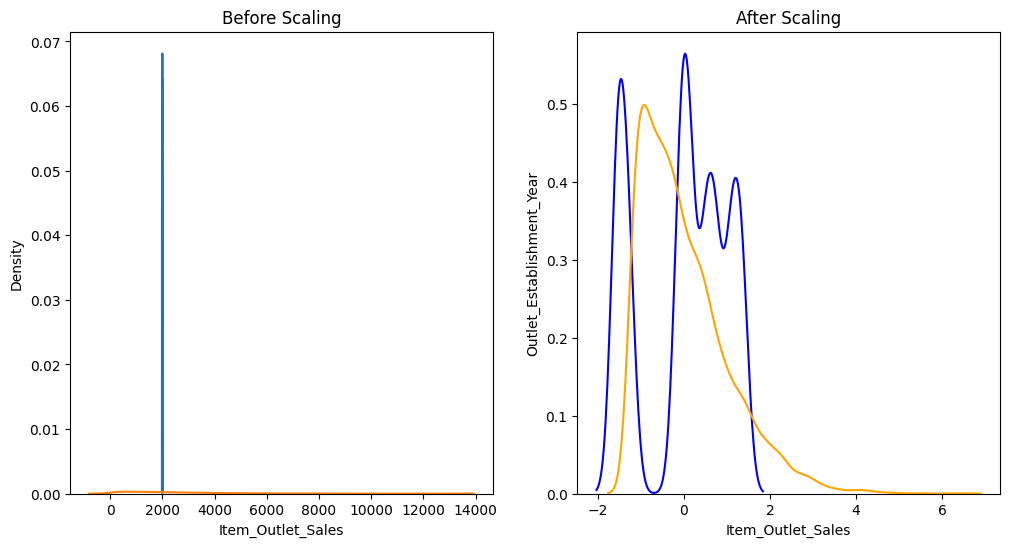

In [72]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
## before scaling
sns.distplot(df['Outlet_Establishment_Year'],ax=ax1,hist=False)
sns.distplot(df['Item_Outlet_Sales'],ax=ax1,hist=False)
ax1.set_title('Before Scaling')
## after scaling
sns.distplot(x_train_scaled[5],ax=ax2,color='blue',hist=False)
sns.distplot(x_train_scaled[9],ax=ax2,color='orange',hist=False)
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Outlet_Establishment_Year')
ax2.set_title('After Scaling')
plt.show()

<ipython-input-73-bafef0af92c1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Outlet_Size'],ax=ax1,hist=False)
<ipython-input-73-bafef0af92c1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'],ax=ax1,hist=False)
<ipython-input-73-bafef0af92c1>:7: U

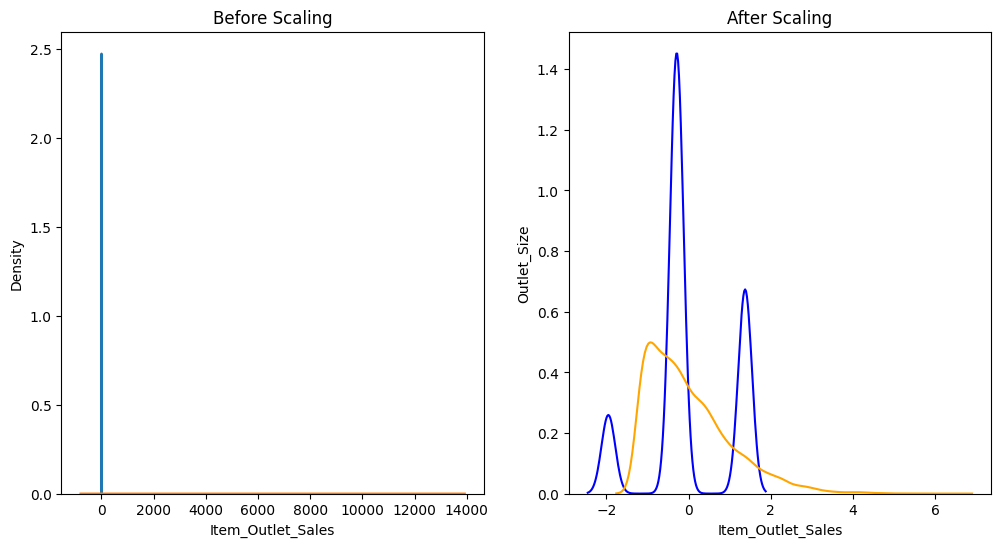

In [73]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
## before scaling
sns.distplot(df['Outlet_Size'],ax=ax1,hist=False)
sns.distplot(df['Item_Outlet_Sales'],ax=ax1,hist=False)
ax1.set_title('Before Scaling')
## after scaling
sns.distplot(x_train_scaled[6],ax=ax2,color='blue',hist=False)
sns.distplot(x_train_scaled[9],ax=ax2,color='orange',hist=False)
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Outlet_Size')
ax2.set_title('After Scaling')
plt.show()

<ipython-input-74-144f2785430d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Outlet_Location_Type'],ax=ax1,hist=False)
<ipython-input-74-144f2785430d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'],ax=ax1,hist=False)
<ipython-input-74-144f27854

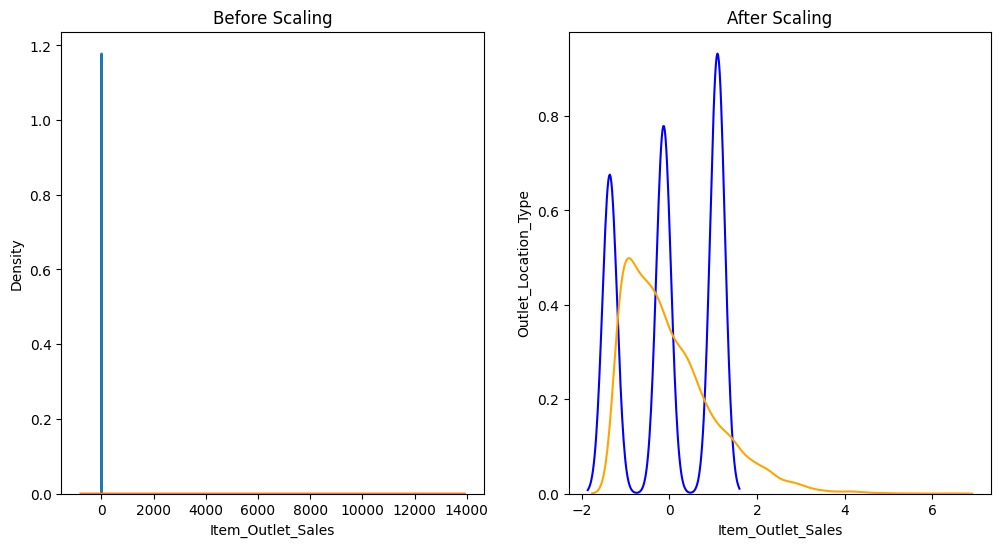

In [74]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
## before scaling
sns.distplot(df['Outlet_Location_Type'],ax=ax1,hist=False)
sns.distplot(df['Item_Outlet_Sales'],ax=ax1,hist=False)
ax1.set_title('Before Scaling')
## after scaling
sns.distplot(x_train_scaled[7],ax=ax2,color='blue',hist=False)
sns.distplot(x_train_scaled[9],ax=ax2,color='orange',hist=False)
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Outlet_Location_Type')
ax2.set_title('After Scaling')
plt.show()

<ipython-input-75-c2a4c1f585a8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Outlet_Type'],ax=ax1,hist=False)
<ipython-input-75-c2a4c1f585a8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'],ax=ax1,hist=False)
<ipython-input-75-c2a4c1f585a8>:7: U

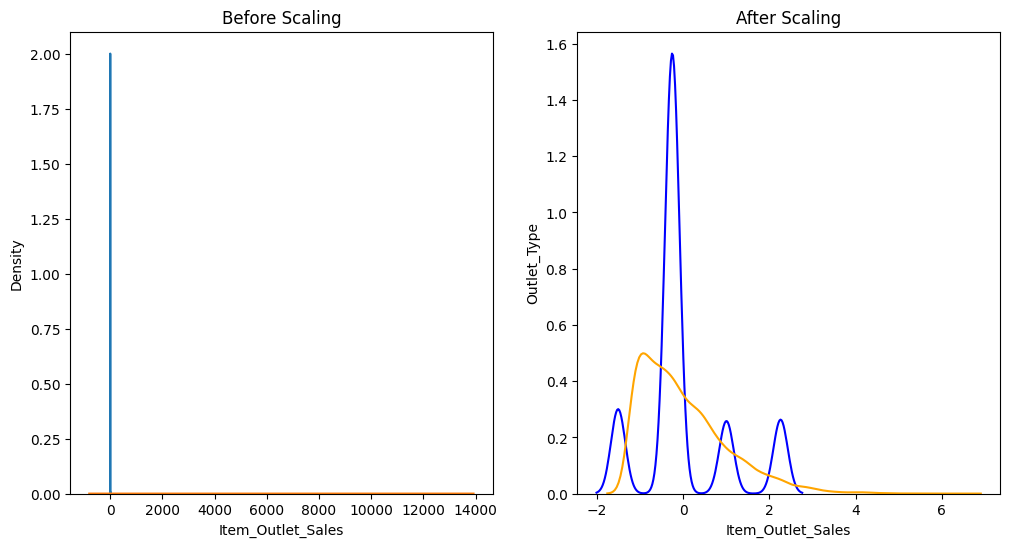

In [75]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
## before scaling
sns.distplot(df['Outlet_Type'],ax=ax1,hist=False)
sns.distplot(df['Item_Outlet_Sales'],ax=ax1,hist=False)
ax1.set_title('Before Scaling')
## after scaling
sns.distplot(x_train_scaled[8],ax=ax2,color='blue',hist=False)
sns.distplot(x_train_scaled[9],ax=ax2,color='orange',hist=False)
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Outlet_Type')
ax2.set_title('After Scaling')
plt.show()

### **Removing Skewness**

In [76]:
import scipy.stats as stats

In [77]:
## using pandas skew() function
df=pd.DataFrame(x_train['Item_Weight'])
print(df.skew())

df=pd.DataFrame(x_train['Item_Fat_Content'])
print(df.skew())

df=pd.DataFrame(x_train['Item_Visibility'])
print(df.skew())

df=pd.DataFrame(x_train['Item_Type'])
print(df.skew())

df=pd.DataFrame(x_train['Item_MRP'])
print(df.skew())

df=pd.DataFrame(x_train['Outlet_Establishment_Year'])
print(df.skew())

df=pd.DataFrame(x_train['Outlet_Size'])
print(df.skew())

df=pd.DataFrame(x_train['Outlet_Location_Type'])
print(df.skew())

df=pd.DataFrame(x_train['Outlet_Type'])
print(df.skew())

df=pd.DataFrame(x_train['Item_Outlet_Sales'])
print(df.skew())

Item_Weight    0.089885
dtype: float64
Item_Fat_Content    0.619799
dtype: float64
Item_Visibility    1.17338
dtype: float64
Item_Type    0.099984
dtype: float64
Item_MRP    0.129515
dtype: float64
Outlet_Establishment_Year   -0.395682
dtype: float64
Outlet_Size   -0.089764
dtype: float64
Outlet_Location_Type   -0.199002
dtype: float64
Outlet_Type    0.932725
dtype: float64
Item_Outlet_Sales    1.181377
dtype: float64


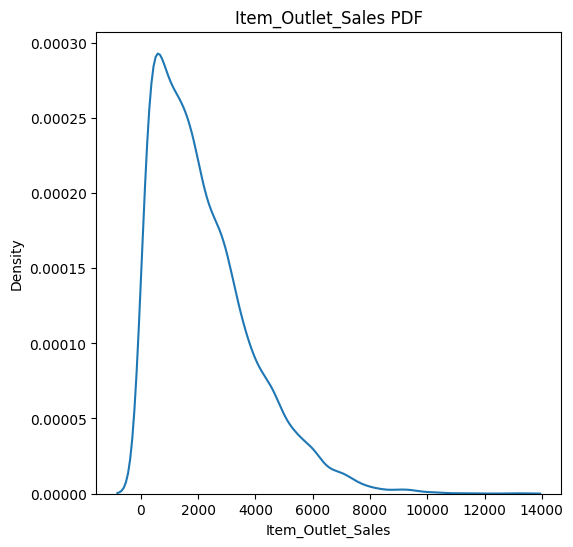

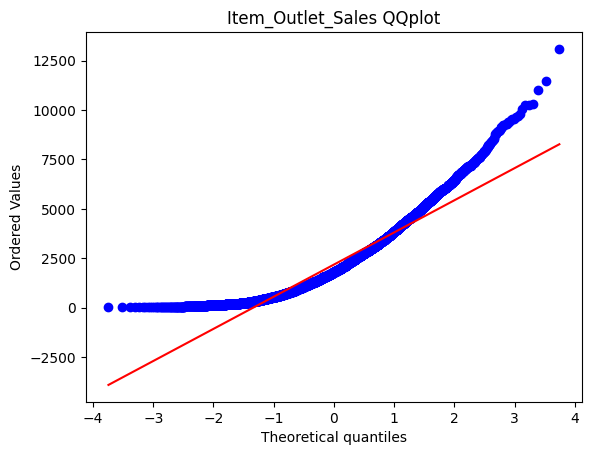

In [78]:
## using QQ plot
plt.figure(figsize=(6,6))
sns.kdeplot(x_train["Item_Outlet_Sales"])
plt.title('Item_Outlet_Sales PDF')
plt.show()

stats.probplot(x_train["Item_Outlet_Sales"],dist='norm',plot=plt)
plt.title('Item_Outlet_Sales QQplot')
plt.show()

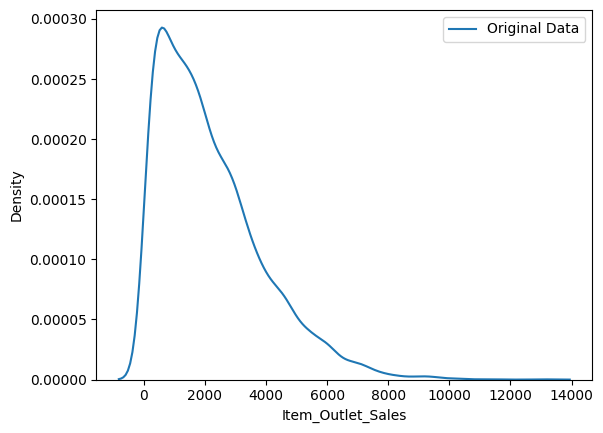

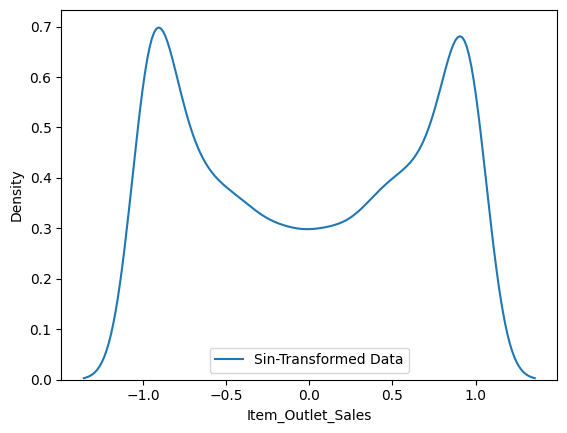

In [79]:
sns.kdeplot(x_train["Item_Outlet_Sales"], label='Original Data')
plt.legend()
plt.show()
sns.kdeplot(np.sin(x_train['Item_Outlet_Sales']), label='Sin-Transformed Data')
plt.legend()
plt.show()

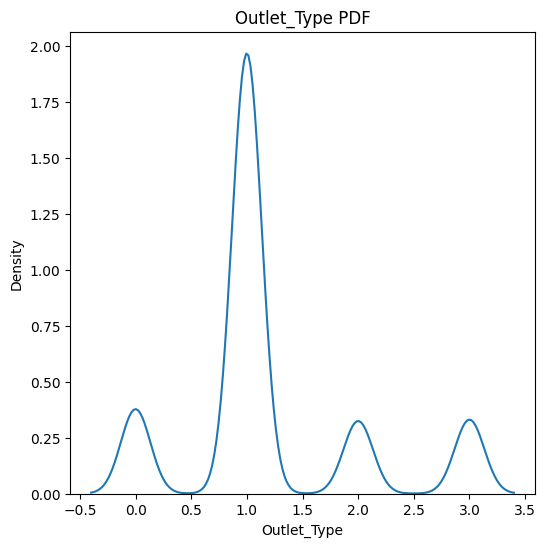

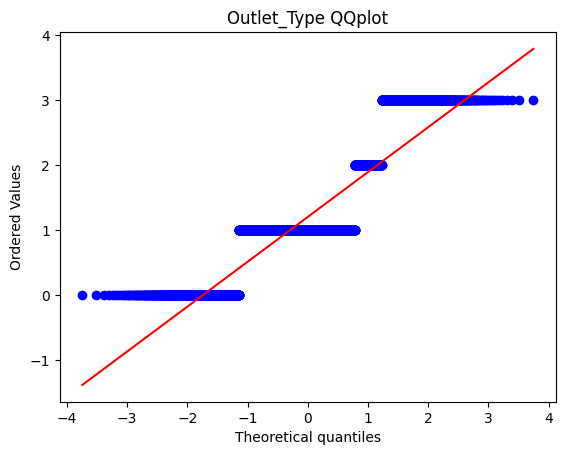

In [80]:
## using QQ plot
plt.figure(figsize=(6,6))
sns.kdeplot(x_train["Outlet_Type"])
plt.title('Outlet_Type PDF')
plt.show()

stats.probplot(x_train["Outlet_Type"],dist='norm',plot=plt)
plt.title('Outlet_Type QQplot')
plt.show()

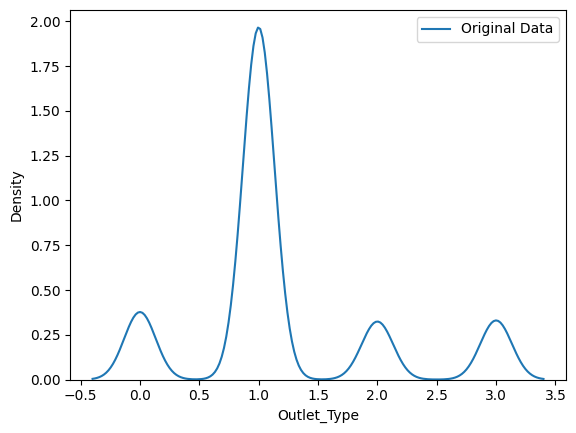

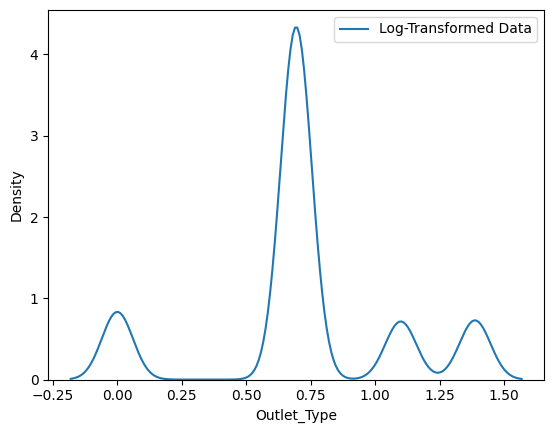

In [81]:
sns.kdeplot(x_train["Outlet_Type"], label='Original Data')
plt.legend()
plt.show()
sns.kdeplot(np.log1p(x_train['Outlet_Type']), label='Log-Transformed Data')
plt.legend()
plt.show()

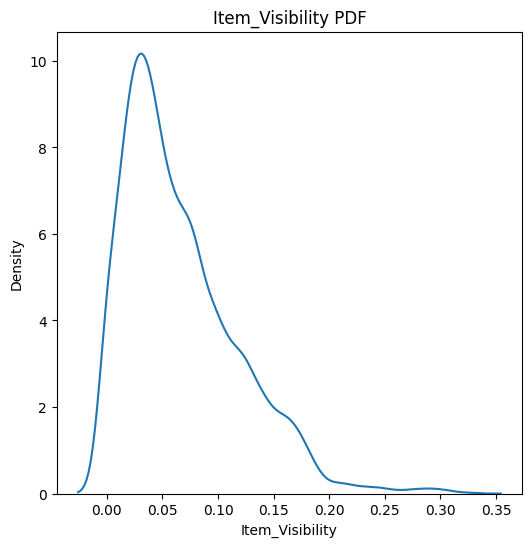

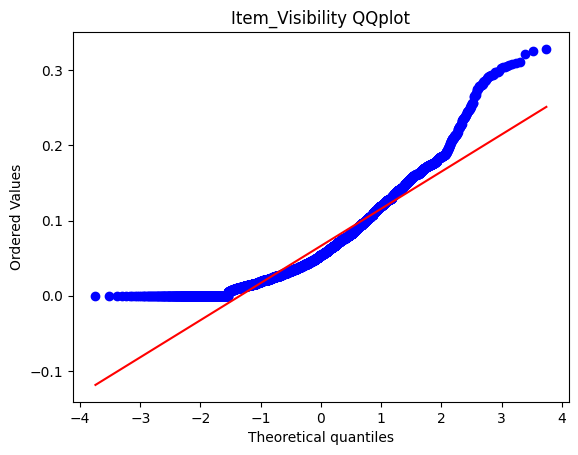

In [82]:
## using QQ plot
plt.figure(figsize=(6,6))
sns.kdeplot(x_train["Item_Visibility"])
plt.title('Item_Visibility PDF')
plt.show()

stats.probplot(x_train["Item_Visibility"],dist='norm',plot=plt)
plt.title('Item_Visibility QQplot')
plt.show()

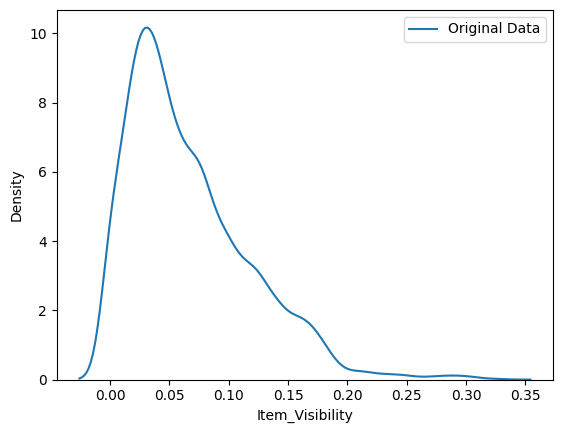

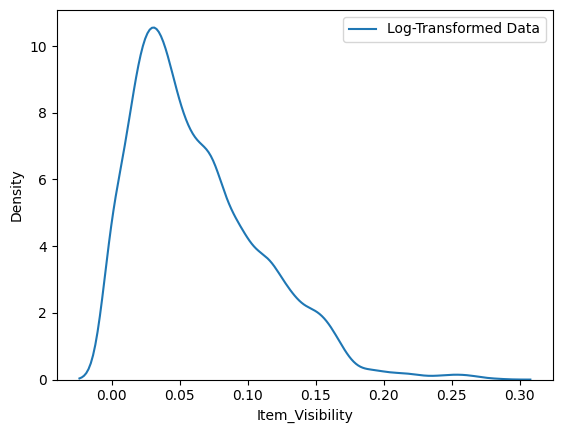

In [84]:
sns.kdeplot(x_train["Item_Visibility"], label='Original Data')
plt.legend()
plt.show()
sns.kdeplot(np.log1p(x_train['Item_Visibility']), label='Log-Transformed Data')
plt.legend()
plt.show()

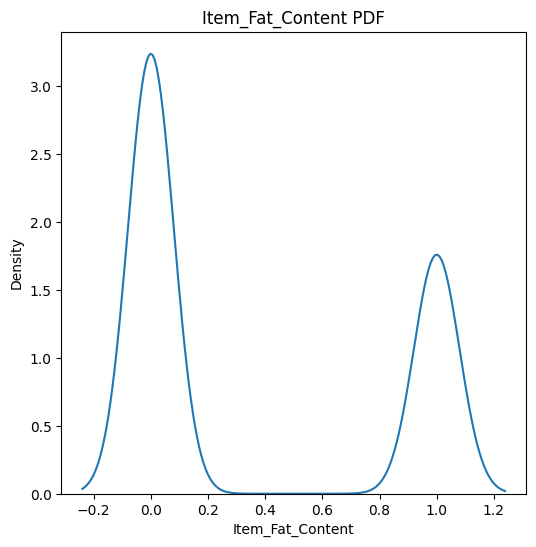

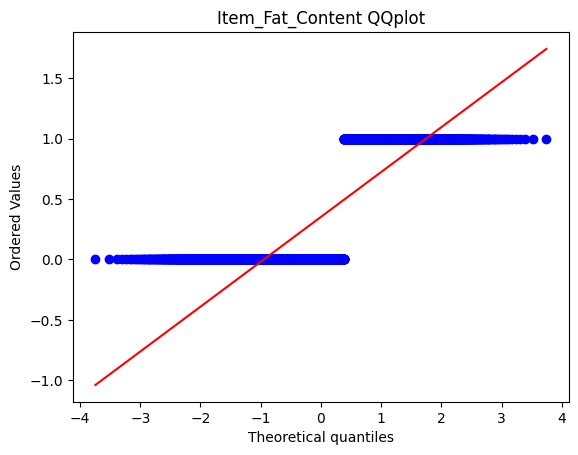

In [85]:
## using QQ plot
plt.figure(figsize=(6,6))
sns.kdeplot(x_train["Item_Fat_Content"])
plt.title('Item_Fat_Content PDF')
plt.show()

stats.probplot(x_train["Item_Fat_Content"],dist='norm',plot=plt)
plt.title('Item_Fat_Content QQplot')
plt.show()

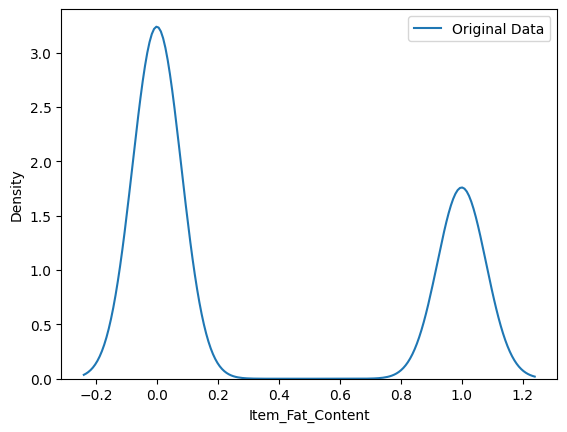

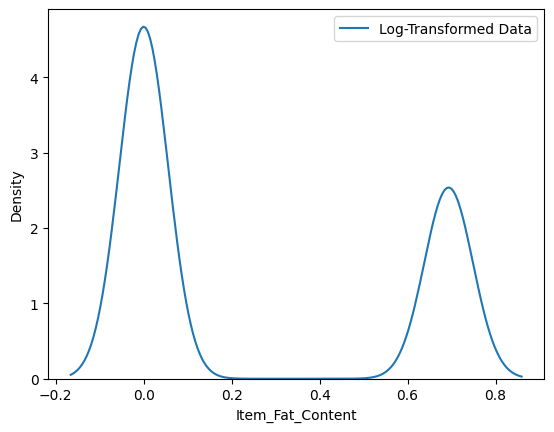

In [86]:
sns.kdeplot(x_train["Item_Fat_Content"], label='Original Data')
plt.legend()
plt.show()
sns.kdeplot(np.log1p(x_train['Item_Fat_Content']), label='Log-Transformed Data')
plt.legend()
plt.show()